In [200]:
from __future__ import print_function
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from time import time
import numpy as np
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.sparse import coo_matrix
from time import time
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from nltk.tokenize import sent_tokenize, word_tokenize
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from nltk.tokenize import sent_tokenize, word_tokenize
from gensim.summarization.bm25 import get_bm25_weights
from nltk.stem import PorterStemmer 
from nltk.corpus import stopwords 
import sklearn
import math
from sklearn.cluster import KMeans

In [225]:

categories = ['comp.graphics',
              'comp.os.ms-windows.misc',
              'comp.sys.ibm.pc.hardware',
              'comp.sys.mac.hardware',
              'rec.autos',
              'rec.motorcycles',
              'rec.sport.baseball',
              'rec.sport.hockey']


In [226]:

dataset = fetch_20newsgroups(subset = 'all',
                             categories = categories,
                             shuffle = True,
                             random_state = 42)



In [203]:
type(dataset.data[0])

str

In [10]:
data=dataset.data

In [11]:

#splitting the documents into list of sentences.
sentences = data

# for i in data:
#     sub_sentence=[]
#     sub_sentence.append(sent_tokenize(i))
#     sub_sentence = [y for x in sub_sentence for y in x] # flatten list
#     sentences.append(sub_sentence)

In [12]:
word_sentence=[]

for i in sentences:
    word_sentence.append(word_tokenize(i))
np.shape(word_sentence)

(7882,)

In [13]:
#removal of stop words
stop_words = set(stopwords.words('english')) 
line=[]
filtered_sentence=[]

for i in word_sentence:
    for j in i:
        if not j in stop_words:
            line.append(j)
    filtered_sentence.append(line)
    line=[]



In [14]:
#stemming the words
from nltk.stem import PorterStemmer 
ps = PorterStemmer()
stemmed_sentences=[]
line=[]
for i in filtered_sentence:
    for j in i:
       line.append(ps.stem(j))
    stemmed_sentences.append(line)
    line=[]

In [15]:
# remove punctuations, numbers and special characters
alphabetic_sentences=[]
line=[]
for i in stemmed_sentences:
    line.append(pd.Series(i).str.replace("[^a-zA-Z]", " "))
    
    
    alphabetic_sentences.append(line)
    line=[]

In [16]:
np.shape(alphabetic_sentences[0])

(1, 346)

In [17]:
line = []

for i in alphabetic_sentences:
   
    for j in i:
        l=[]
        for x in j.values:
            if (not x ==' ' ):
                l.append(x.lower())
        line.append(l)


In [23]:
final=[]
for i in line:
    a=""
    for j in i:
        a=a + " " + j
    final.append(a)
np.shape(final)

(7882,)

In [248]:
(final[0])

' from jim n ial mythical com jim graham subject re possibl faq question uart keyword       organ me joke line    thought i  d post e mail case interest info        in articl     apr                henson cc wwu edu n        henson cc wwu edu dan jordan write hello question e mail name manufactur       predecsor uart i refer number find technic manual ic find technic spec uart appreci prefer             i suggest direct origin prefer     qualiti sourc chip nation semiconductor reach                 longer packag data sheet book i mine individu set data sheet minimum set data sheet ns      ins    a ns  c    ins  c  a ns     af applic note get these an     the ns     a uart design applic consider an     a comparison ins     ns      ns     af seri uart applic note i list proven at least valuabl data sheet an     except well written applic note detail       advantag btw send free long n t abus    jim    includ std disclaimer h    de n ial                                                    

In [322]:
vectorizer=CountVectorizer(max_df = 0.4,
                             max_features = 100000,
                             min_df = 2,
                             stop_words = 'english'
                             
                          )

X = vectorizer.fit_transform(final)


In [325]:
print(X)

  (0, 23418)	2.3457840518561612
  (0, 11908)	2.3457840518561612
  (0, 14868)	1.0371257965645275
  (0, 11899)	2.3457840518561612
  (0, 10809)	0.8034544903756332
  (0, 15858)	2.3457840518561612
  (0, 20728)	2.3457840518561612
  (0, 704)	2.3457840518561612
  (0, 7769)	1.4746277782160409
  (0, 1743)	1.6387565469729966
  (0, 25335)	2.196043167048047
  (0, 8190)	1.599696039676282
  (0, 26593)	2.3457840518561612
  (0, 18880)	1.2796406428919513
  (0, 642)	1.9041173681930474
  (0, 10428)	2.2876972849992065
  (0, 16672)	0.964360920125249
  (0, 10487)	1.8595898888045534
  (0, 10992)	0.8296695316347699
  (0, 5763)	2.041362723339396
  (0, 22089)	1.2887439812610422
  (0, 10716)	0.8588349110823906
  (0, 89)	1.9204591638907549
  (0, 13289)	0.824788829368998
  (0, 8096)	1.0005336200489887
  :	:
  (7881, 21415)	1.4225296741674966
  (7881, 3366)	2.3932443943604027
  (7881, 21150)	2.6807798065617146
  (7881, 16978)	3.073451464534326
  (7881, 17906)	2.1269950415668246
  (7881, 190)	1.5649566419621894
  (78

In [301]:
np.unique(dataset.target)

array([0, 1])

In [324]:

X = coo_matrix(X)
N = float(X.shape[0])
idf = np.log(N / (np.bincount(X.col)))

# calculate length_norm per document (artist)
row_sums = np.ravel(X.sum(axis=1))

average_length = row_sums.mean()
length_norm = (0.5) + 1.5 * row_sums / average_length
X.data = X.data  / (length_norm[X.row] + X.data) * idf[X.col]

In [231]:
# Plot information
def plot_confusion_matrix(cm, classes, clusters, title = ''):
    plt.imshow(cm, interpolation = 'nearest', cmap = plt.cm.Blues)
    plt.title(title)
    plt.colorbar()
    xtick_marks = np.arange(len(clusters))
    ytick_marks = np.arange(len(classes))
    plt.xticks(xtick_marks, clusters, rotation = 45)
    plt.yticks(ytick_marks, classes)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

In [232]:
size = dataset.target.shape[0]
labels = dataset.target

count=0
for i in range(0, size):
    if(dataset.target[i] <= 3):
        labels[i] = 0
        count+=1
    else:
        labels[i] = 1
        
count

3903

In [196]:

        
class_names = ['Computer technology', 'Recreational activity']
kvalue = 2
cluster_names = []
for i in range(kvalue):
    cluster_names.append("cluster %d" % i)



In [407]:
# K-Means clustering with k = kvalue = 2
km = KMeans(n_clusters = kvalue, init = 'k-means++', max_iter = 100, n_init = 1, verbose = False)

km.fit(X)
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
cm = metrics.confusion_matrix(labels, km.labels_)


np.shape(terms)

(26832,)

In [408]:

print("Top 10 terms per cluster:")
for i in range(kvalue):
    print("Cluster %d:" % i, end='')
    for j in order_centroids[i, :10]:
        print(' %s' % terms[j], end='')
    print()


Top 10 terms per cluster:
Cluster 0: game car com year team ca apr play player bike
Cluster 1: window file thank card problem comput program mac work com


Confusion matrix:
[[3857   58]
 [ 122 3845]]
Homogeneity score: 0.845
Completeness score: 0.845
Adjusted rand score: 0.911
Adjusted mutual info score: 0.845


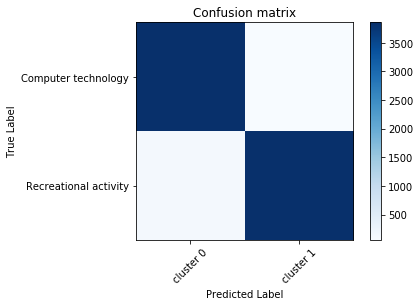

In [426]:
print("Confusion matrix:")
print(cm)
print("Homogeneity score: %0.3f" % metrics.homogeneity_score(labels, km.labels_))
print("Completeness score: %0.3f" % metrics.completeness_score(labels, km.labels_))
print("Adjusted rand score: %.3f" % metrics.adjusted_rand_score(labels, km.labels_))
print("Adjusted mutual info score: %0.3f" % metrics.adjusted_mutual_info_score(labels, km.labels_))

plt.figure()
plot_confusion_matrix(cm,
                      classes = class_names,
                      clusters = cluster_names,
                      title = 'Confusion matrix')
plt.show()



In [423]:
cm=np.array([[cm[1,0] ,cm[0,0]] , [cm[1,1] ,cm[0,1]]])

In [424]:
np.shape(h)

(2, 2)

In [425]:
h

array([[3857,   58],
       [ 122, 3845]])